<a href="https://colab.research.google.com/github/gowtham-dd/Data-Science-Basics/blob/main/Flight_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flight Price Prediction EDA + FE

In [119]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
train_df=pd.read_excel('/content/Data_Train.xlsx')
test_df=pd.read_excel('/content/Test_set.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [121]:

final_df = pd.concat([train_df, test_df], ignore_index=True)
final_df.tail()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13353,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [122]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


## Feature Engneering

In [123]:
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [124]:
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.4+ MB


In [125]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019


In [126]:
## Arrival time
final_df['Arrival_Time']=final_df['Arrival_Time'].str.split(' ').str[0]
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019


In [127]:
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min']=final_df['Arrival_Time'].str.split(':').str[1]
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10


In [128]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_min']=final_df['Arrival_min'].astype(int)
final_df.drop('Arrival_Time',axis=1,inplace=True)
final_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15


In [129]:
## null val
final_df.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Route,1
Dep_Time,0
Duration,0
Total_Stops,1
Additional_Info,0
Price,2671
Date,0


In [130]:
final_df['Dep_Time']=final_df['Dep_Time'].str.split(' ').str[0]
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10


In [131]:
final_df['Dept_hour']=final_df['Dep_Time'].str.split(':').str[0]
final_df['Dept_min']=final_df['Dep_Time'].str.split(':').str[1]
final_df['Dept_hour']=final_df['Dept_hour'].astype(int)
final_df['Dept_min']=final_df['Dept_min'].astype(int)
final_df.drop('Dep_Time',axis=1,inplace=True)
final_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50


In [132]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int64  
 9   Month            13354 non-null  int64  
 10  Year             13354 non-null  int64  
 11  Arrival_hour     13354 non-null  int64  
 12  Arrival_min      13354 non-null  int64  
 13  Dept_hour        13354 non-null  int64  
 14  Dept_min         13354 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 1.5+ MB


In [133]:
## Route
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [134]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':5})
final_df.head(2)


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50


In [135]:
final_df.drop('Route',axis=1,inplace=True)
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


<Axes: xlabel='count', ylabel='Additional_Info'>

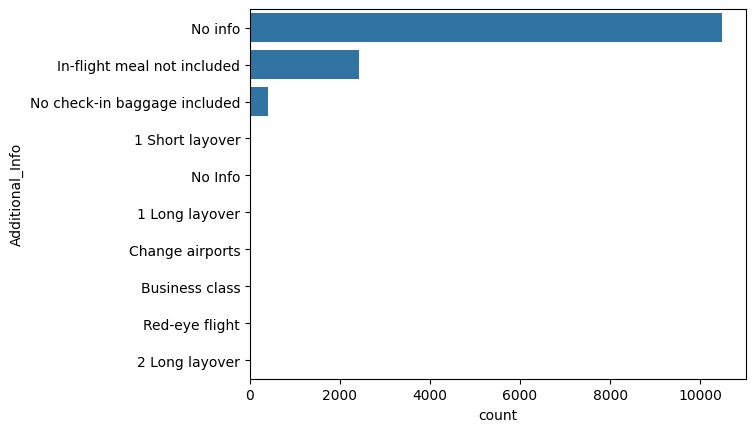

In [136]:
sns.countplot(final_df['Additional_Info'])

In [137]:
final_df['Duration']

,Duration
0,2h 50m
1,7h 25m
2,19h
3,5h 25m
4,4h 45m
...,...
13349,23h 55m
13350,2h 35m
13351,6h 35m
13352,15h 15m


In [138]:
## Duration
final_df['Duration_hour']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]
final_df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7


In [139]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(13343,axis=0,inplace=True)

In [140]:
## Duration
final_df['Duration_hour']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]
final_df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7


In [141]:
final_df['Duration_hour']=final_df['Duration_hour'].astype(int)
final_df.head(2)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13352 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13352 non-null  object 
 1   Source           13352 non-null  object 
 2   Destination      13352 non-null  object 
 3   Duration         13352 non-null  object 
 4   Total_Stops      13351 non-null  float64
 5   Additional_Info  13352 non-null  object 
 6   Price            10682 non-null  float64
 7   Date             13352 non-null  int64  
 8   Month            13352 non-null  int64  
 9   Year             13352 non-null  int64  
 10  Arrival_hour     13352 non-null  int64  
 11  Arrival_min      13352 non-null  int64  
 12  Dept_hour        13352 non-null  int64  
 13  Dept_min         13352 non-null  int64  
 14  Duration_hour    13352 non-null  int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 1.6+ MB


In [142]:
final_df.drop('Duration',axis=1,inplace=True)

In [143]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [144]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()


In [145]:
final_df['Airlines']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])
final_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hour,Airlines
0,IndiGo,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2,3
1,Air India,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7,1


In [146]:
## One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [147]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hour,Airlines
0,IndiGo,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2,3
1,Air India,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7,1
2,Jet Airways,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,19,4
3,IndiGo,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,5,3
4,IndiGo,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,4,3


In [148]:
final_df = pd.get_dummies(final_df, columns=['Airline', 'Source', 'Destination', 'Additional_Info'], drop_first=True)
final_df

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,Duration_hour,...,Destination_5,Additional_Info_1,Additional_Info_2,Additional_Info_3,Additional_Info_4,Additional_Info_5,Additional_Info_6,Additional_Info_7,Additional_Info_8,Additional_Info_9
0,0.0,3897.0,24,3,2019,1,10,22,20,2,...,True,False,False,False,False,False,False,False,True,False
1,2.0,7662.0,1,5,2019,13,15,5,50,7,...,False,False,False,False,False,False,False,False,True,False
2,2.0,13882.0,9,6,2019,4,25,9,25,19,...,False,False,False,False,False,False,False,False,True,False
3,1.0,6218.0,12,5,2019,23,30,18,5,5,...,False,False,False,False,False,False,False,False,True,False
4,1.0,13302.0,1,3,2019,21,35,16,50,4,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,1.0,NaN,6,6,2019,20,25,20,30,23,...,False,False,False,False,False,False,False,False,True,False
13350,0.0,NaN,27,3,2019,16,55,14,20,2,...,False,False,False,False,False,False,False,False,True,False
13351,1.0,NaN,6,3,2019,4,25,21,50,6,...,False,False,False,False,False,False,False,False,True,False
13352,1.0,NaN,6,3,2019,19,15,4,0,15,...,False,False,False,False,False,False,False,False,True,False
